<h3> NBA 5 year careeer prediction using Random Forest Classifier

<h5> The following model aims to predict if a rookie NBA player will remain in the league for 5 or more years based on the players first year rookie statistics. The data set contains a Target of 1 if the player reaches 5 years or more in the league and a Target of 0 if it doesn't reach at least 5 years in the league. <br> Random Forest Classifier has been selected as a machine learning model to generate the predictions. 

In [2]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Firstly, we will load the balanced and scaled train, validation and test sets using a custom built function saved on the src folder <br> <br> The analysis and transformation of the raw data has been done in the 1_data_prep notebook as a previous step and sets were saved in the ../data/processed folder

In [3]:
#Load Test and validation sets from custom function
from src.data.sets import load_sets

In [4]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets( )

<h4> 2. Import Random Forest Classifier

<h5> This step imports the random forest classifier and analyse the feature importance/relevance in the predictions from the training set imported in previous step using sklearn SelectFromModel

In [5]:
from sklearn.ensemble import RandomForestClassifier

<h4> 2.1 Analyse features importance in random forest model with current training sets

In [45]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 300, random_state=44))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=300,
                                                 random_state=44))

<h4> 2.2 Finding the most relevant features in making predictions

<h5> After the model has been fitted, we use get.support to find out which features are most relevant in the predictions

In [46]:
columns = sel.get_support()
columns = columns.tolist()
columns

[True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

<h5> As column importance is given in order of appearance on the scaled set, importing column names saved in data_prep for easy visualization and identification will be performed

<h5> Importing predictor column names and combining with relevant columns to find out the best feature predictors

In [48]:
predictors  = pd.read_csv('../data/interim/predictor_names.csv')

In [49]:
predictors['Relevant_Feature'] = columns

In [50]:
predictors

,names,Relevant_Feature
0,GP,True
1,MIN,True
2,PTS,True
3,FGM,False
4,FGA,False
5,FG%,True
6,3P Made,False
7,3PA,False
8,3P%,True
9,FTM,False


In [51]:
predictors.loc[predictors['Relevant_Feature'] == 1]

,names,Relevant_Feature
0,GP,True
1,MIN,True
2,PTS,True
5,FG%,True
8,3P%,True
11,FT%,True


<h5> <b>CONCLUSION ON PREDICTORS: </b> Based on the rebalanced training set from data_prep, 6 features are the most relevant predictors. Therefore new data prep will be generated for usage of these columns within the model

<h4> 2.3 New data prep to be performed and data sets saved in the ../data/interim folder

<h5> 2.3.1 Get a list of column names to be removed from data set

In [57]:
columns_to_remove_df = predictors.loc[predictors['Relevant_Feature'] == 0]

In [58]:
columns_to_remove = columns_to_remove_df.pop("names")

In [59]:
columns_to_remove_list = columns_to_remove.values.tolist()

<h5> 2.3.2 Read csvs and remove unwanted columns

In [60]:
df = pd.read_csv('../data/raw/2022_train.csv')

In [61]:
df_cleaned = df.copy()
df_cleaned.drop(columns=columns_to_remove_list, axis=1, inplace=True)
df_cleaned.drop("Id", axis=1, inplace=True)

In [62]:
df_cleaned.head()

,GP,MIN,PTS,FG%,3P%,FT%,TARGET_5Yrs
0,80,24.3,7.8,45.7,22.6,72.1,1
1,75,21.8,10.5,55.1,34.9,67.8,1
2,85,19.1,4.5,42.8,34.3,75.7,1
3,63,19.1,8.2,52.5,23.7,66.9,1
4,63,17.8,3.7,50.8,13.7,54.0,1


<h5> 2.3.3 Rebalance imbalance set with custom function

<h5> This function will undersample the mayority class to have the same number of observations of the minority class. <br> <br> This function is saved in the src folder

In [17]:
from src.data.sets import rebalance_mayority_class

In [65]:
df_rebalanced = df_cleaned.copy()

In [19]:
df_rebalanced = rebalance_mayority_class(df_cleaned, "TARGET_5Yrs")

In [67]:
df_rebalanced

,GP,MIN,PTS,FG%,3P%,FT%
0,80,24.3,7.8,45.7,22.6,72.1
1,75,21.8,10.5,55.1,34.9,67.8
2,85,19.1,4.5,42.8,34.3,75.7
3,63,19.1,8.2,52.5,23.7,66.9
4,63,17.8,3.7,50.8,13.7,54.0
...,...,...,...,...,...,...
7995,32,9.2,1.8,40.3,23.1,65.7
7996,54,6.0,1.8,48.7,3.1,70.1
7997,85,28.2,10.7,45.1,23.6,69.7
7998,39,7.7,2.5,40.1,13.3,74.3


<h5> 2.3.4 Scaling and generating training and validation set

<h5> The rebalanced data set will be split into training and validation set for fitting and evaluation of the random model classifier model <br><br> The rebalancing will be performed with a custom function saved in the src folder

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
target = df_rebalanced.pop("TARGET_5Yrs")

In [22]:
df_rebalanced_clean = scaler.fit_transform(df_rebalanced)

In [23]:
#Import subset function for getting training and valudation sets
from src.data.sets import subset_x_y

In [24]:
X_train, X_val, y_train, y_val = subset_x_y(df_rebalanced_clean, target)

<h5> 2.3.5 Clean, transform and scale Test set

<h5> This step will clean, trasnform and scale the test data set with the same steps from the training set

In [25]:
df_test = pd.read_csv('../data/raw/2022_test.csv')

In [26]:
X_test_ID = df_test.pop('Id')

In [27]:
X_test = df_test.copy()

In [28]:
X_test.drop(columns=columns_to_remove_list, axis=1, inplace=True)

In [29]:
X_test = scaler.fit_transform(X_test)

<h5> 2.3.6 Save train, evaluate and test sets in ../data/interim folder

<h5> Finally, all cleaned and transfor sets will be saved in the data/interim folder using a custom function saved in the src folder

In [30]:
from src.data.sets import save_sets_interim

In [31]:
save_sets_interim(X_train, X_val, y_train, y_val, X_test, X_test_ID)

<h4> 3 Train Random Forest Classifier with new calculated training sets

<h5> Next up, the random forest classifier will be imported and trained with the new training set and saved into the models folder

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=44)

In [33]:
#Save model in the models folder
from joblib import dump
dump(rf_model, '../models/random_forest_default.joblib')

['../models/random_forest_default.joblib']

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy vs Baseline

<h5> The fitted model will be used to predict the validation set and accuracy willl be calculated to compare vs the baseline

In [34]:
y_trainpreds = rf_model.predict(X_train)
y_val_preds = rf_model.predict(X_val)

<h4> 3.2 Calculate mse and mae to assess fiting accuracy for the training and validation sets

In [35]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [36]:
print(mse(y_train, y_trainpreds, squared=False))
print(mae(y_train, y_trainpreds))

0.0
0.0


In [37]:
print(mse(y_val, y_val_preds, squared=False))
print(mae(y_val, y_val_preds))

0.5713615613349458
0.32645403377110693


In [38]:
rf_model.score(X_train, y_train)

1.0

In [39]:
rf_model.score(X_val, y_val)

0.6735459662288931

<h5> <b> Results: </b> Training set show a perfect fit to the balanced training set with mse=0 and mae=0. However, the results drop when evaluating the validation set to mse=0.57 and mae=0.32. <br> Baseline mse=0.37 and mae=0.27 meaning the model is not better than the baseline when evaluated with the validation set mse=0.37

<h4> 3 Analysis of the validation set

<h5> Analysis of the results will be done through a confusion matrix to gather insights as to where the accuracy/innacuracy exists in order to improve the model in future experiments

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

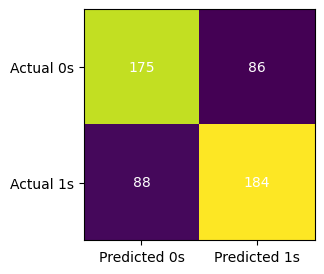

In [41]:
cm = confusion_matrix(y_val, y_val_preds)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

<h5> <b> Conclusion </b> The prediction accuracy rate for zeroes and ones is 67% for each class, which is the same score obtained from Kaggle when submitting the results for the test set and the same score from the model.score evaluation from the previous step. This consistency parity suggests there is more feature engineering required for improving prediction on the outliers (false positives and false negatives)

<h4> 4 Generate predictions on the test set for Kaggle submission

<h5> The final step is to generate the prediction probabilities from the test set in order to evaluate the score from Kaggle via csv upload

In [42]:
#y_test_preds = rf_model.predict(X_test)

In [43]:
y_test_preds = rf_model.predict_proba(X_test)

In [44]:
y_test_preds_list = y_test_preds.tolist()
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds_list]

In [45]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [46]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [47]:
df.head()

,Id,TARGET_5Yrs
0,0,0.29
1,1,0.41
2,2,0.79
3,3,0.65
4,4,0.41


In [48]:
#Saving predictions into csv within ../data/external folder
df.to_csv('../data/external/Kaggle_submission_random_forest.csv', index=False)

<h5> From this submition, the best Kaggle score is 0.67